# Analysis of the distribution and influence of diet 

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [2]:
df = pd.read_csv('profiles.csv')

In [3]:
df1=df.assign(approximate_diet=pd.Series([str(x).split()[-1] for x in df['diet']]))


## Diet vs Income

## Why is eating kosher important?
### More money!  :)
 From this graph, we can conclude:
1.	Men earns more (Well-known fact).
2.	Kosher is better
3.	Muslims men earns more, but the women earns less.


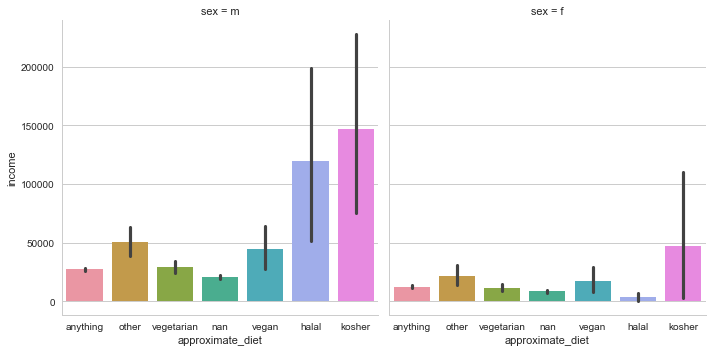

In [4]:
g=sns.factorplot(x="approximate_diet", y="income", col="sex", size=5, data=df1, kind="bar")


In [5]:
df1['e']=1

## Type of diet acording to gender

In [6]:
sexbyDiet=df1.groupby(by=['approximate_diet', 'sex' ]).count()['e'].unstack()
sumOnSext=sexbyDiet.sum(axis=1).values
p_dietbySex=sexbyDiet.transpose()/sumOnSext
p_dietbySex
p_dietbySex= p_dietbySex.drop('nan',1)


In [7]:
p_dietbySex.transpose()

sex,f,m
approximate_diet,,
anything,0.367777,0.632223
halal,0.220779,0.779221
kosher,0.408696,0.591304
other,0.428492,0.571508
vegan,0.511396,0.488604
vegetarian,0.553550,0.446450


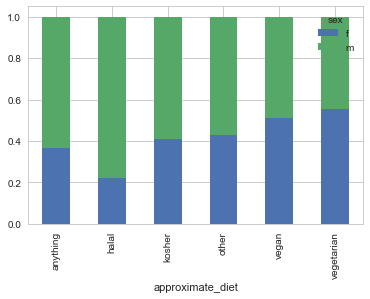

In [8]:
p_dietbySex.transpose().plot(kind='bar', stacked=True)


## Eating and drinking

In [9]:
DrinkbyDiet=df1.groupby(by=['approximate_diet', 'drinks' ]).count()['e'].unstack()
sumOnDiet=DrinkbyDiet.sum(axis=1).values
p_byDiet=DrinkbyDiet.transpose()/sumOnDiet
p_byDiet= p_byDiet.drop('nan',1)

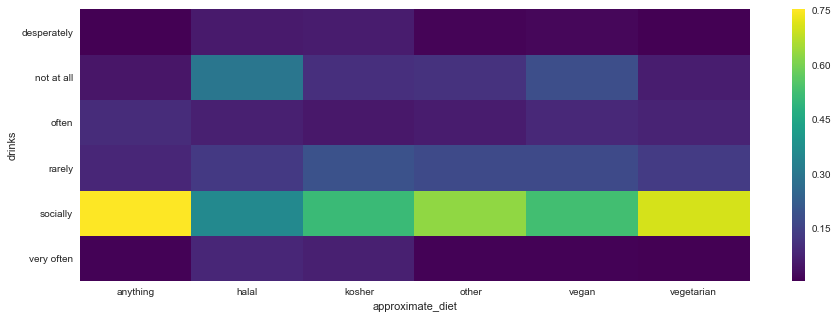

In [10]:
plt.figure(figsize=(15,5))
sns.heatmap(p_byDiet,cmap='viridis')

## Height and diet

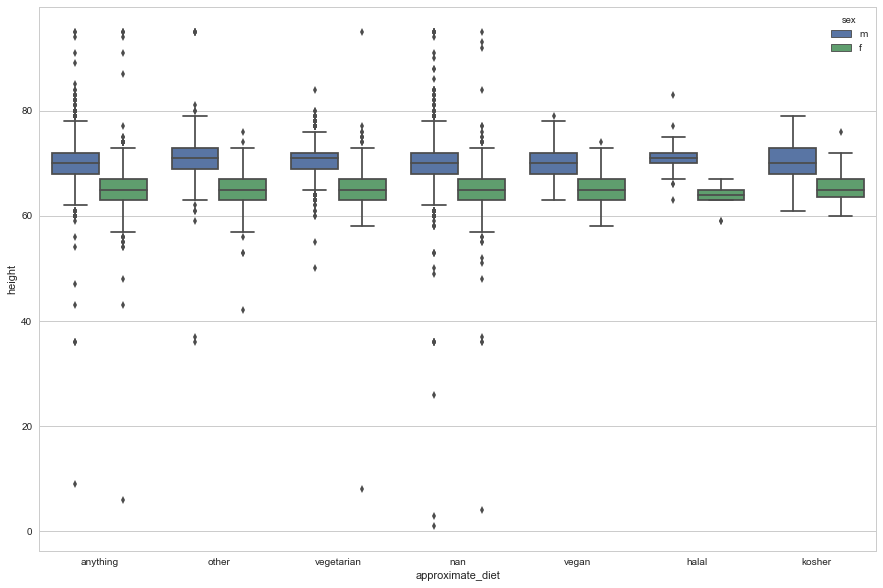

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(x='approximate_diet', y='height', hue='sex', data=df1)

# Diet according to ethnicity

In [12]:
df1=df1.assign(main_ethnicity=pd.Series([str(x).split(',')[0] for x in df1['ethnicity']]))
EthkbyDiet=df1.groupby(by=['approximate_diet', 'main_ethnicity' ]).count()['e'].unstack()
sumOnDE=EthkbyDiet.sum(axis=1).values
EthkbyDiet= EthkbyDiet.drop('nan',1)

In [13]:
p_byE=EthkbyDiet.transpose()/sumOnDE
p_byE= p_byE.drop('nan',1)
p_byE

approximate_diet,anything,halal,kosher,other,vegan,vegetarian
main_ethnicity,,,,,,
asian,0.157240,0.129870,0.043478,0.091061,0.069801,0.065183
black,0.049460,0.246753,0.139130,0.072067,0.041311,0.035098
hispanic / latin,0.075320,0.051948,0.060870,0.085475,0.069801,0.053951
indian,0.016750,0.064935,NaN,0.010056,0.004274,0.047734
middle eastern,0.013020,0.116883,0.069565,0.013408,0.018519,0.013839
native american,0.010939,0.012987,0.017391,0.029050,0.025641,0.018051
other,0.025358,0.129870,0.069565,0.051397,0.047009,0.035700
pacific islander,0.012482,0.025974,0.017391,0.014525,0.005698,0.006619
white,0.570819,0.155844,0.452174,0.539665,0.584046,0.617329


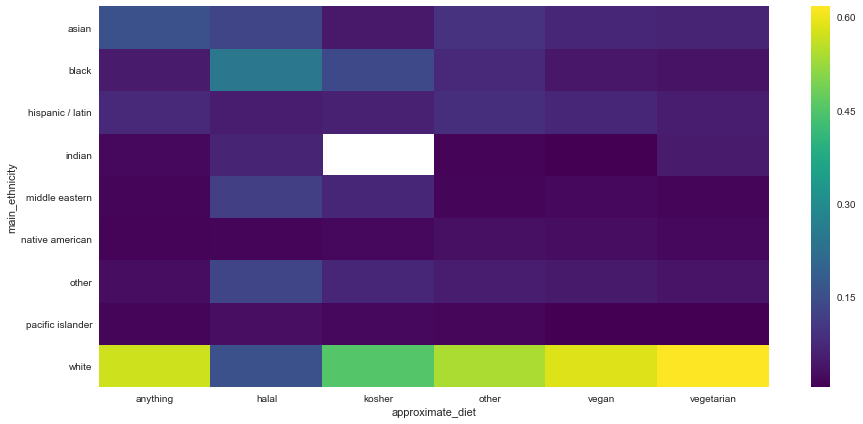

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(p_byE,cmap='viridis')

# Education type

([<matplotlib.axis.XTick at 0x2841407d780>,
 <a list of 5 Text xticklabel objects>)

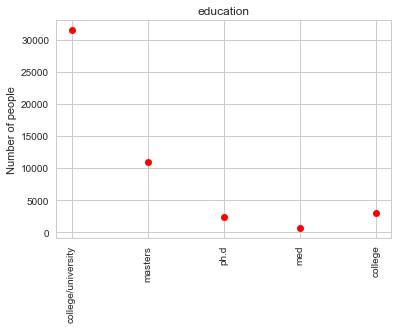

In [15]:
(df1['education']).value_counts()
edu='(college/university)|(masters)|(ph.d)|(med)|(college)'
A=pd.Series(df1['education']).str.extractall(edu)
B=A.count()
plt.plot(B,'ro')
plt.ylabel('Number of people')
plt.title('education')
labels = ['college/university', 'masters', 'ph.d', 'med', 'college']
plt.xticks([0 ,1 ,2 ,3 ,4], labels, rotation='vertical')


In [28]:
s1=df1['education'].str.contains('college/university')==True
s2=df1['education'].str.contains('masters')==True
s3=df1['education'].str.contains('ph.d')==True
s4=df1['education'].str.contains('med')==True
s5=df1['education'].str.contains('college')==True
df3=df1[s1 | s2 | s3| s4| s5]


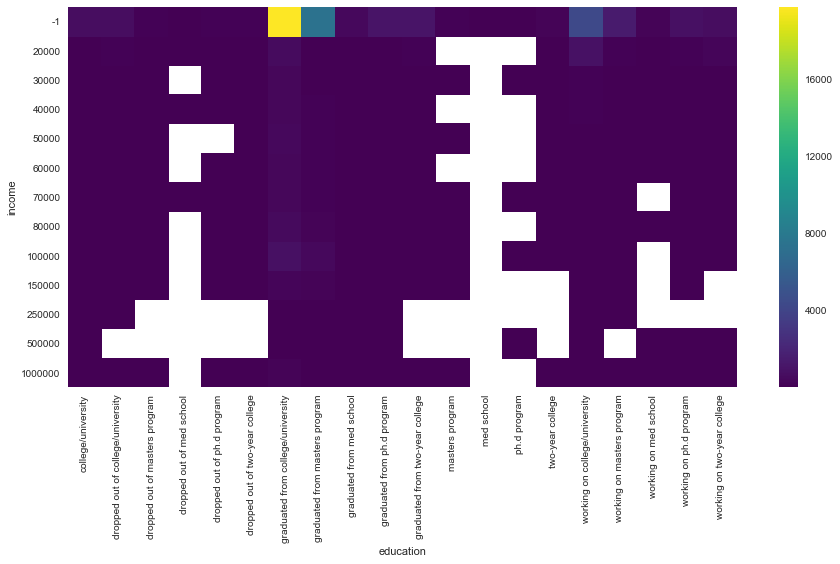

In [31]:
plt.figure(figsize=(15,7))

EDbyDiet=df3.groupby(by=['income', 'education' ]).count()['e'].unstack()
sns.heatmap(EDbyDiet,cmap='viridis')
